In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import scipy

In [33]:
# select the data base file
df = pd.read_csv('../Database/pointing_corr_arr4_f150_snrT25_obs2_FullSeason_withEverything.csv')

In [34]:
df.columns

Index(['Ctime', 'Freq', 'Array', 'Offset X', 'Error Offset X', 'Offset Y',
       'APEX T', 'APEX T 2 hr ago', 'Elevation 2 hr ago', 'Azimuth 2 hr ago',
       'Angular Distance 2 hr ago', 'Azimuth Sun 2 hr ago',
       'Elevation Sun 2 hr ago', 'Error Offset Y', 'Modulus Offset',
       'Elevation', 'Azimuth', 'T_Pan_R8_6', 'T_Pan_R8_3', 'T_Pan_R7_8',
       'T_Pan_R7_5', 'T_Pan_R7_3', 'T_Pan_R6_6', 'T_Pan_R6_3', 'T_Pan_R5_9',
       'T_Pan_R5_5Lo', 'T_Pan_R5_5Hi', 'T_Pan_R4_6', 'T_Pan_R4_3',
       'T_Pan_R3_7', 'T_Pan_R3_5', 'T_Pan_R3_1', 'T_Pan_R2_6', 'T_Pan_R2_2',
       'T_Pan_R1_2', 'Elevation Sun', 'Azimuth Sun', 'Angular Distance'],
      dtype='object')

In [35]:
# data selection
# Select the variables that you want to correlate
df_pca = pd.DataFrame()
vars_arr = ['Offset Y','APEX T','Azimuth','Elevation','Elevation Sun','Azimuth Sun','Angular Distance','APEX T 2 hr ago','Azimuth 2 hr ago','Elevation 2 hr ago','Elevation Sun 2 hr ago','Azimuth Sun 2 hr ago','Angular Distance 2 hr ago',]

for var in vars_arr:
    df_pca[var] = df[var]


In [36]:
df_pca

,Offset Y,APEX T,Azimuth,Elevation,Elevation Sun,Azimuth Sun,Angular Distance,APEX T 2 hr ago,Azimuth 2 hr ago,Elevation 2 hr ago,Elevation Sun 2 hr ago,Azimuth Sun 2 hr ago,Angular Distance 2 hr ago
0,0.7297,-1.772727,5.563935,0.787667,0.010731,4.805797,1.024119,0.727273,0.869174,0.787667,0.481659,5.040465,1.564531
1,0.6740,-4.390909,1.146856,0.700401,-0.217910,4.709167,2.533508,0.090909,0.869174,0.787667,0.260855,4.919091,1.809527
2,0.5020,-5.100000,1.146856,0.700401,-0.305919,4.671211,2.626885,-0.618182,0.869174,0.787667,0.174346,4.878055,1.903429
3,0.3681,-4.990909,1.146856,0.700401,-0.431727,4.614141,2.758779,-1.754545,0.869174,0.787667,0.049426,4.822444,2.037535
4,0.3557,-5.290909,1.146856,0.700401,-0.475450,4.593116,2.803832,-1.772727,0.869174,0.787667,0.005665,4.803631,2.084152
5,0.3774,-4.518182,1.146856,0.700401,-0.689399,4.474802,2.998116,-4.263636,0.869174,0.700401,-0.211483,4.711900,2.355341
6,0.3363,-4.481818,1.146856,0.700401,-0.732059,4.446621,3.018224,-4.500000,0.869174,0.700401,-0.255532,4.693076,2.399490
7,0.3999,-4.400000,1.146856,0.700401,-0.774315,4.416480,3.021485,-5.072727,0.869174,0.700401,-0.299497,4.674022,2.443123
8,0.2352,-5.727273,0.928690,0.700401,0.006380,1.482948,0.857648,-6.018182,0.869174,0.596379,-0.475149,1.692739,1.325271
9,0.2235,-5.572727,0.928690,0.700401,0.050263,1.464201,0.810550,-6.090909,0.869174,0.669508,-0.431332,1.671731,1.333062


Eigenvalues: (The variance of the each priciple components-PC) 
 [4.14235468 2.41307893 1.54003696]

 Eigenvalues ratios: (The ratio of each variance over total) 
 [0.3184262  0.18549535 0.1183839 ]

 Eigenvectors: (like the vector direction of each PC) 
 [[ 0.36861149  0.3002999   0.0222105  -0.19587523  0.45563527 -0.09582084
  -0.35790326  0.19506807  0.01181386 -0.11544123  0.39753109 -0.2462878
  -0.34640845]
 [-0.16639083  0.29343919 -0.0151397   0.08077337 -0.11718262  0.55042862
   0.06061754  0.46457014  0.12883177  0.00832576  0.22770849  0.49682506
  -0.16702519]
 [ 0.05823314  0.0564324  -0.2497301   0.62363321  0.08046657 -0.03414269
  -0.16299754  0.0267446  -0.17092762  0.68014951  0.04725107 -0.0855702
  -0.07643425]]


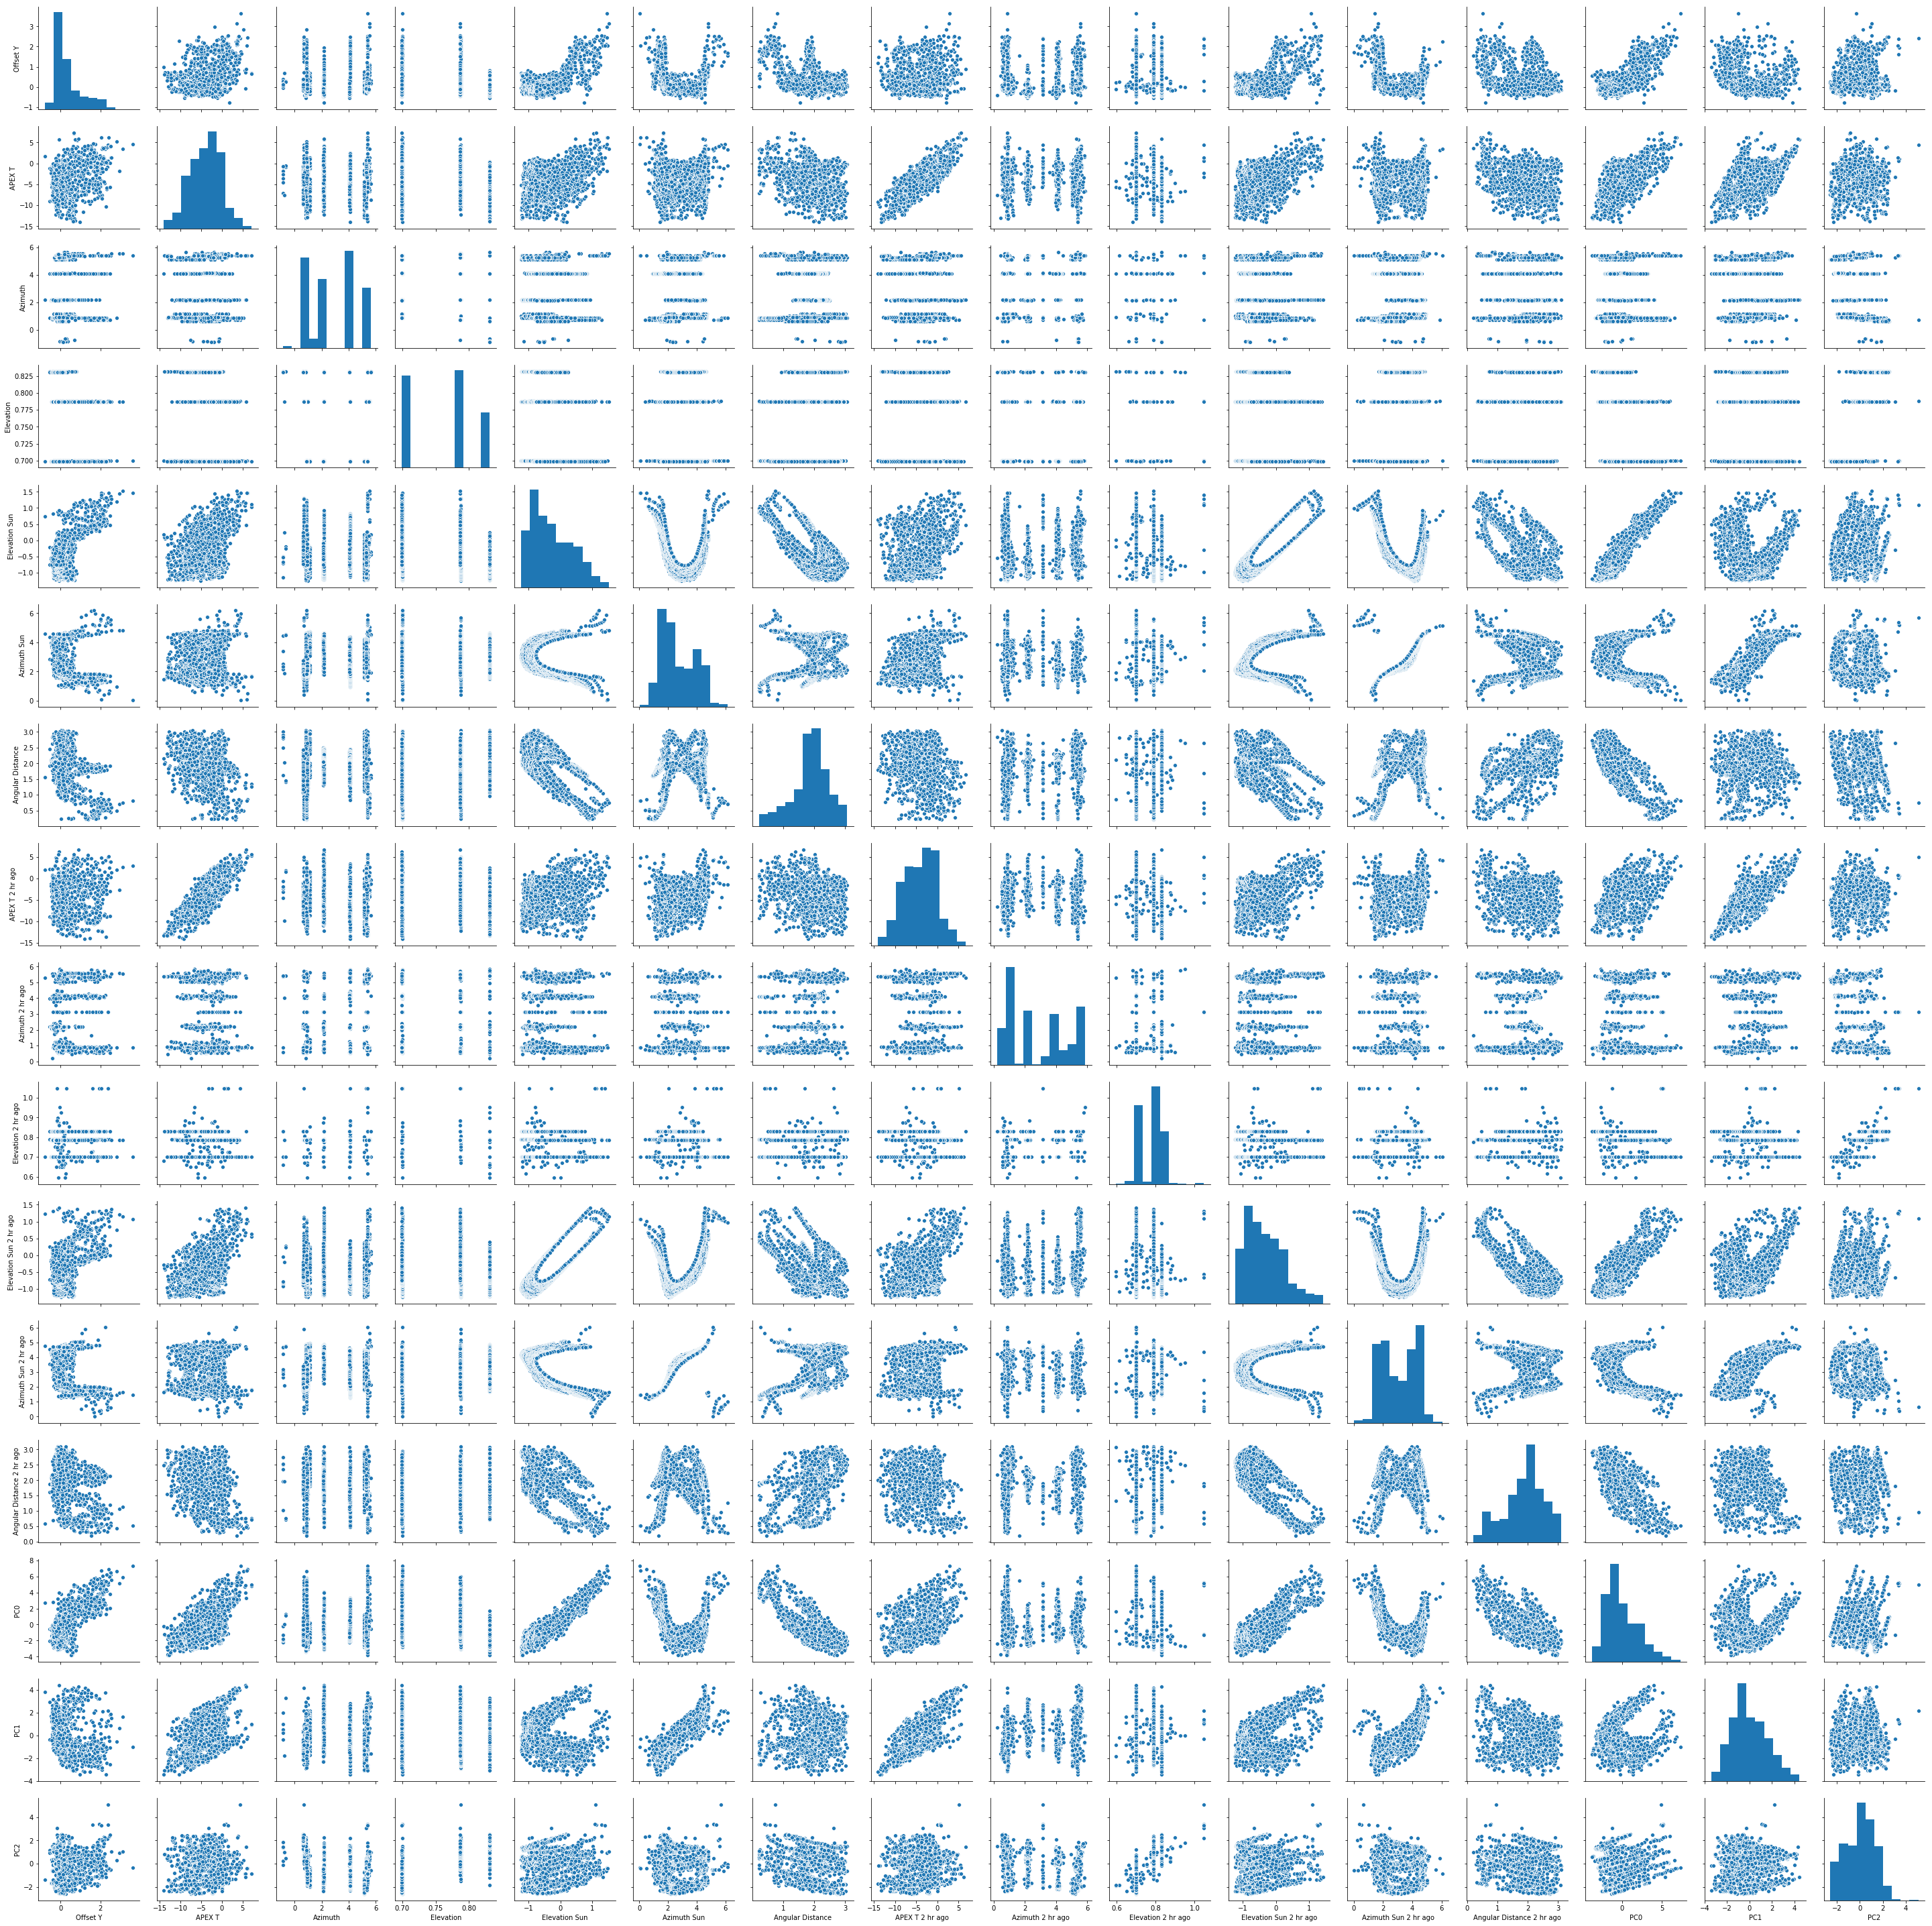

In [37]:
standize = StandardScaler().fit(df_pca)
# transform the data into standardized version
data_sd = standize.transform(df_pca)

# make the data_sd also in dataframe form easy for visulization
column_names = df_pca.columns
data_sd = pd.DataFrame(data_sd, columns=column_names)
#display('df_pca','data_sd')

## set up pca 
pca = PCA(n_components=3)  ## n_components is the number of PC components that you want to keep
## fit the PCA tranforamtion 
pca_on_data_sd = pca.fit(data_sd)

##### now the pca is already done on data_sd, you can check eigenvalue and vectors and so on, eg:
print('Eigenvalues: (The variance of the each priciple components-PC) \n',pca_on_data_sd.explained_variance_)
print('\n Eigenvalues ratios: (The ratio of each variance over total) \n',pca_on_data_sd.explained_variance_ratio_)
print('\n Eigenvectors: (like the vector direction of each PC) \n', pca_on_data_sd.components_)

## transform the data into PC space, also put into dataframe
data_pc = pca_on_data_sd.transform(data_sd)
PC_names = ['PC'+str(i) for i in range(pca.n_components_)]
data_pc = pd.DataFrame(data_pc,columns=PC_names)
#display('data_sd','data_pc')

df_all = pd.concat([df_pca,data_pc],axis=1)

## pairplot
plot = sns.pairplot(df_all)

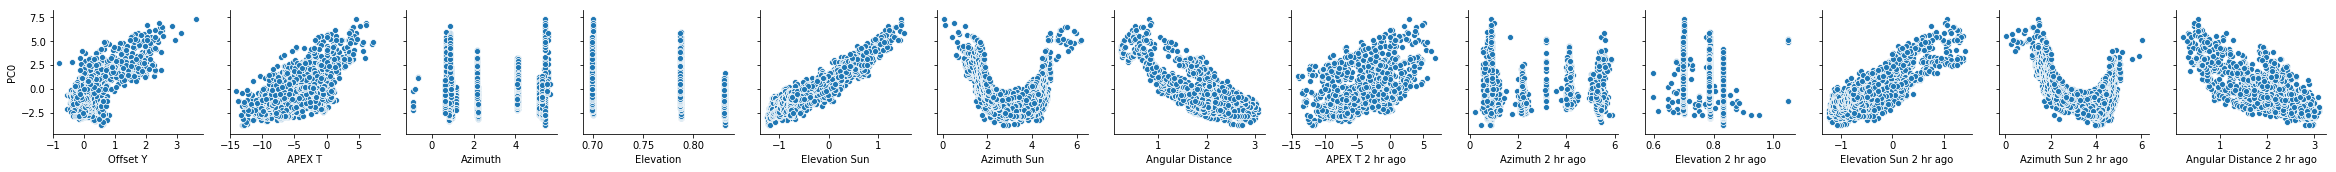

In [38]:
# Zoom in on the PC0
sns.pairplot(df_all,x_vars=vars_arr,y_vars=['PC0'])